# Project 1: First steps in Machine Learning (40 Points)
In this project, you will train and test your first machine learning models. Please follow the **TODO**s in this notebook. There are practical and theoretical tasks to do.<br>
When working on the tasks please consider the following information:
* write short texts in **full sentences** answering the TODOs. Note, that analyzing the theoratical parts of the project give roughly 2/3 of all points
* when describing classifiers explain at least the training, testing, and the hyper-parameters
* always train your models using the given training sets
* evaluate the models using the given test sets
* have a look at all imports in this notebook; they already define which method you should use

You should work in a group of 3. Please enter your names and your TA here.<br>
Students: Basel Ammo & Linus Behrbohm<br>
TA: Yasir Plückebaum

On Monday, **7th December**, there will be a Q&A session in the tutorials! Start to work on this project from now on and take the offer to resolve any remaining ambiguity.
This assignment is due on **Sunday, 29.11.2020 11:59pm**. Please upload your solution to the Lernraum+.<br>
 For a submission you need to be part of a assignment group.

## kNN - Classifier

In [2]:
import numpy as np
# load dataset 1
data_set = np.load('dataset_1.npz')
X_train = data_set['X_train']
X_test = data_set['X_test']
y_train = data_set['y_train']
y_test = data_set['y_test']

### The first dataset

The first dataset is split into a training and a test dataset with input and expected output data each. The format of the input data is a 2D vector, and the output format is an integer with a value of 0 or 1. There are 536 samples in the training data set and 264 samples in the test data set.

         Sample Count     Shape                     Type  \
X_train           536  (536, 2)  <class 'numpy.ndarray'>   
X_test            264  (264, 2)  <class 'numpy.ndarray'>   
y_train           536    (536,)    <class 'numpy.int64'>   
y_test            264    (264,)    <class 'numpy.int64'>   

                                            First  
X_train  [-0.5620843131908109, 1.023539813565548]  
X_test   [0.5015381401243244, 0.3271658222313503]  
y_train                                         0  
y_test                                          1  


Text(0.5, 1.0, 'Test')

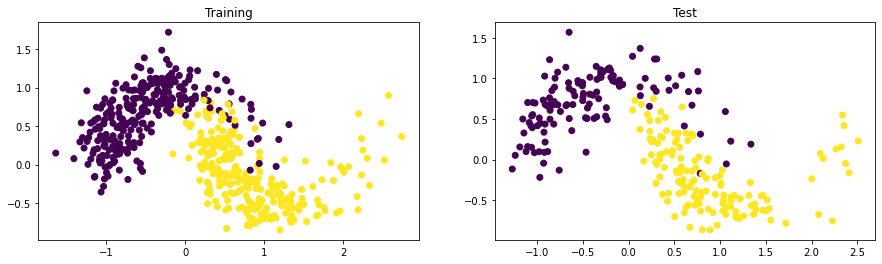

In [26]:
# TODO: take a closer look at the dataset, e.g. number of samples, dimensionality, labels, etc.
import pandas as pd
import matplotlib.pyplot as plt

# generic function to extract named properties from the data set items
# fs is a list of tuples, first a name, then a function mapping an item to a property
def property_table(fs, data_set):
    keys = list(data_set.keys()) # row names
    props = list(map(lambda f: f[0], fs)) # column names
    funcs = list(map(lambda f: f[1], fs)) # property functions
    items = list(map(lambda t: t[1], data_set.items())) # data items
    data = zip(*list(map(lambda f: map(f, items), funcs))) # each prop for each item
    return pd.DataFrame(data, index=keys, columns=props) # use pandas.DataFrame to print a table
    
data_frame = property_table([
        ('Sample Count', lambda item: len(item)),
        ('Shape', lambda item: item.shape),
        ('Type', lambda item: type(item[0])),
        ('First', lambda item: item[0]),
    ], data_set)

print(data_frame)

fig, axs = plt.subplots(1, 2)
fig.set_figwidth(15)
axs[0].scatter(*zip(*X_train), c=y_train)
axs[0].set_title("Training")

axs[1].scatter(*zip(*X_test), c=y_test)
axs[1].set_title("Test")


### the Model

The kNN-Classifier learns a probability distribution in a space based on a set of input points with previously assigned classes, i.e. by supervised training. There can be any number of classes. The kNN-Classifier calculates the probability of any new point belonging to a specific class as the proportion of points from the k nearest known points with that specific class. I.e. for any given point x, the probability to belong to a specific class c is calculated by the number of points with class c in the nearest k points of x, divided by k. The predicted class by the kNN-Classifier is the class with the maximum probability.

In [120]:
# TODO: train a kNN classifier with k=5 on the training set and test it with the test set

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import functools
foldl = lambda acc, f, xs: functools.reduce(f, xs, acc)

def train_and_predict_knn(k, data_set):
    X_train = data_set['X_train']
    X_test = data_set['X_test']
    y_train = data_set['y_train']
    y_test = data_set['y_test']
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y=knn_classifier.predict(X_test)
    # ensure y_test.size != 0
    if y_test.size == 0: return 1
    # count number of correct predictions and divide them by total number of samples
    return foldl(0, lambda acc, t: acc + (t[0]==t[1]), zip(y, y_test))/y_test.size

train_and_predict_knn(5, data_set)
print(accuracy)

0.9810606060606061


The kNN-Classifier with k=5 reached a 98% accuracy on the test data set.

The best choice for k in [1, 536] is 5 with an accuracy of 0.9810606060606061


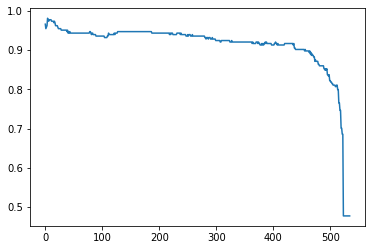

In [156]:
# TODO: train and test the kNN classifier for different values of k on dataset 1.
#       Plot the accuracy for different values of k. Choose usefull lower and upper bounds for k.
import matplotlib.pyplot as plt
lo = 1
hi = 536
accuracies = list(map(lambda k: train_and_predict_knn(k, data_set), range(lo,hi)))
plt.plot(accuracies)
max_index = max(range(0, len(accuracies)), key=lambda i: accuracies[i])
print('The best choice for k in [{}, {}] is {} with an accuracy of {}'.format(lo, hi, max_index+lo, accuracies[max_index]))

**TODO:** Answer the following questions in a **full text**.

* Describe your choice of values of k. Why did you choose them?
* For which values of k does the model perform best?
* Would this value perform best on another dataset as well?
* How can k be choosen?
* What is the smallest and the greatest possible value for k? What would happen if we would choose these special values?

I chose values 1 between 536, because 1 is the minimum number of neighbors possible and 536 is the number of samples in the data set, so that would be the maximum number of neighbors possible in this data set. The model turned out to perform best for k=5. This may be different for other data sets, and it depends on the number of samples in the data set, aswell as the distribution of the classes being learned. This has to be learned for each data set, by trying out different values for k. A rule of thumb might be, if you have a lot of data already, you can choose lower values of k, because the boundaries between the classes will already be well distiguished in the data you already have. Higher values of k are more sensitive to unbalanced data sets, whereas smaller values for k are more sensitive to noisy data sets. As mentioned, the smallest possible value for k is 1, as this is the minimum number of neighbors possible. The largest possible value is the number of points in the data set, as this is the maximum number of neighbors a point can have in any data set. Note that the point being predicted is not part of the data set we already know the classes of. If we chose k=1 we would classify each new point as the same class as the closest known point next to it. If we chose k as the total number of samples in data set, we would predict every new point to be of the class that is most frequent in the data set, since all points are considered.

## Logistic Regression
Let's try another model as well.

### the Dataset

In [ ]:
# TODO: load dataset_2.npz and analyze the dataset
data_set = np.load('dataset_2.npz')
X_train = data_set['X_train']
X_test = data_set['X_test']
y_train = data_set['y_train']
y_test = data_set['y_test']

**TODO:** Describe the data

### the Model

**TODO:** Describe the logistic regression model

In [ ]:
# TODO: train and test logistic regression on dataset_2.npz (using the training and test set),
# plot the dataset and the decision boundary, own implementation needed (see lecture slide 51 in slides1.pdf)

from sklearn.linear_model import LogisticRegression


**TODO:** Report your results.

In [ ]:
# TODO: Check whether w separates the two classes.
#       How does the negative log-likelihood (NLL) change for αw as α goes to infinity?
#
# Hint: Implement an own function which computes the NLL for a new w, and report the NLL for different values.

**TODO:** What can you infer from your observations regarding the training of a model?

### thoeretical considerations

**TODO:** Prove that 

$$\lim_{\alpha\to\infty}-\log\left(P\left(\left.\mathcal{D}\right|\vec{w}\right)\right)=0$$
if $\vec{w}$ splits the data perfectly where $\mathcal{D}$ represents the data.

**Hint:** You can analyze both cases, y=0 and y=1, and find a limit of the likelihood for one sample. Then, calculate the limit of the negative log-likelihood.


## Comparing kNN and Logistic Regression
Finally, we want you to compare the kNN and the logistic regression classifier.

In [ ]:
# TODO: train both kNN and logistic regression on the training set for both datasets.
#       Evaluate the models using the respective test set.
# Plot the data and the decision boundary of the classifiers. plot_2d_decisionboundary() in utils.py can be used.

from utils import plot_2d_decisionboundary
from utils import plot_classification_dataset


**TODO:** Describe your results and analyze them: Is one model performing better than the other? Is there a difference in the datasets causing this behavior?